In [1]:
### Steps
# Create 3 folder  traing, testing and validation.
# Training( 2 folder happy and not happy)

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pylab as plt
import tensorflow as tf
import numpy as np
import cv2
import os

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
img=image.load_img(r'/content/drive/MyDrive/Colab Notebooks/happy_sad/training/happy/Modi.png')

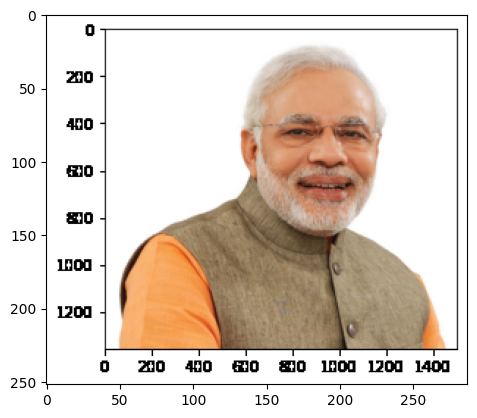

In [5]:
plt.imshow(img)

In [7]:
i1= cv2.imread(r'/content/drive/MyDrive/Colab Notebooks/happy_sad/training/happy/Modi.png')
i1

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [8]:
i1.shape

(252, 287, 3)

In [9]:
train=ImageDataGenerator(rescale=1/255)
validation=ImageDataGenerator(rescale=1/255)

In [10]:
train

In [11]:
validation

In [ ]:
!rm -rf /content/sample_data/training

In [ ]:
!rm -rf /content/sample_data/validation

In [12]:
train_dataset=train.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/happy_sad/training',
                                        target_size=(200,200),
                                        batch_size=3,
                                        class_mode='binary')
validation_dataset=validation.flow_from_directory(r'/content/drive/MyDrive/Colab Notebooks/happy_sad/validation',
                                                  target_size=(200,200),
                                                  batch_size=3,
                                                  class_mode='binary')

Found 20 images belonging to 2 classes.
Found 22 images belonging to 2 classes.


In [13]:
 train_dataset.class_indices

{'happy': 0, 'sad': 1}

In [14]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=int32)

In [15]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 99, 99, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 48, 48, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 23, 23, 64)        0

In [25]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
              metrics=['accuracy', 'precision', 'recall', 'f1_score'])


In [27]:
# history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))


NameError: ignored

In [17]:
model_fit=model.fit(train_dataset,
                   steps_per_epoch=3,
                   epochs=10,
                   validation_data=validation_dataset)

Epoch 1/10
3/3 [==============================] - 14s 5s/step - loss: 11.6851 - acc: 0.3333 - val_loss: 0.7638 - val_acc: 0.5000
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 2.0653 - acc: 0.3333 - val_loss: 0.6891 - val_acc: 0.5909
Epoch 3/10
3/3 [==============================] - 5s 2s/step - loss: 0.6702 - acc: 0.7500 - val_loss: 0.7837 - val_acc: 0.5000
Epoch 4/10
3/3 [==============================] - 6s 2s/step - loss: 0.9092 - acc: 0.5556 - val_loss: 0.7588 - val_acc: 0.5000
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 0.6899 - acc: 0.6250 - val_loss: 0.6779 - val_acc: 0.5000
Epoch 6/10
3/3 [==============================] - 4s 2s/step - loss: 0.5821 - acc: 0.7500 - val_loss: 0.6951 - val_acc: 0.4545
Epoch 7/10
3/3 [==============================] - 4s 1s/step - loss: 0.6250 - acc: 0.7500 - val_loss: 0.7124 - val_acc: 0.5455
Epoch 8/10
3/3 [==============================] - 3s 1s/step - loss: 0.4774 - acc: 1.0000 - val_loss: 0.8263 

In [30]:
from tensorflow.keras.metrics import Accuracy

model.compile(
    loss='binary_crossentropy',
    optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.001),
    metrics=[Accuracy()]
)


In [31]:
history.history??

Object `history.history` not found.


In [35]:
history = model.fit(train_dataset, epochs=10, validation_data=validation_dataset)


Epoch 1/10
7/7 [==============================] - 8s 866ms/step - loss: 2.1288 - accuracy: 0.1000 - val_loss: 1.6997 - val_accuracy: 0.0000e+00
Epoch 2/10
7/7 [==============================] - 5s 790ms/step - loss: 0.5746 - accuracy: 0.0000e+00 - val_loss: 0.7310 - val_accuracy: 0.0000e+00
Epoch 3/10
7/7 [==============================] - 8s 1s/step - loss: 0.2327 - accuracy: 0.0000e+00 - val_loss: 0.8063 - val_accuracy: 0.0000e+00
Epoch 4/10
7/7 [==============================] - 5s 832ms/step - loss: 0.2401 - accuracy: 0.0000e+00 - val_loss: 0.8487 - val_accuracy: 0.0000e+00
Epoch 5/10
7/7 [==============================] - 8s 1s/step - loss: 0.0879 - accuracy: 0.0000e+00 - val_loss: 1.0283 - val_accuracy: 0.0000e+00
Epoch 6/10
7/7 [==============================] - 5s 741ms/step - loss: 0.0293 - accuracy: 0.0000e+00 - val_loss: 1.2830 - val_accuracy: 0.0000e+00
Epoch 7/10
7/7 [==============================] - 5s 751ms/step - loss: 0.0060 - accuracy: 0.0000e+00 - val_loss: 1.4389 -

In [36]:
print(history.history)

{'loss': [2.128751277923584, 0.5746341943740845, 0.2326851338148117, 0.24012517929077148, 0.08786438405513763, 0.02927808091044426, 0.006018972955644131, 0.005752706900238991, 0.006657901220023632, 0.001146663329564035], 'accuracy': [0.10000000149011612, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], 'val_loss': [1.6997357606887817, 0.7309589982032776, 0.8063452243804932, 0.8487117886543274, 1.0283101797103882, 1.2829972505569458, 1.438922643661499, 1.7312568426132202, 1.5187832117080688, 1.6909568309783936], 'val_accuracy': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


In [37]:
print(history.history.keys())


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


Epoch 1/10
3/3 [==============================] - 3s 1s/step - loss: 7.0134e-05 - accuracy: 0.1111 - val_loss: 2.2075 - val_accuracy: 0.0000e+00
Epoch 2/10
3/3 [==============================] - 3s 1s/step - loss: 6.9543e-05 - accuracy: 0.1111 - val_loss: 2.2801 - val_accuracy: 0.0000e+00
Epoch 3/10
3/3 [==============================] - 4s 1s/step - loss: 2.6618e-05 - accuracy: 0.2222 - val_loss: 2.2831 - val_accuracy: 0.0000e+00
Epoch 4/10
3/3 [==============================] - 5s 2s/step - loss: 3.5262e-05 - accuracy: 0.1111 - val_loss: 2.3507 - val_accuracy: 0.0000e+00
Epoch 5/10
3/3 [==============================] - 3s 1s/step - loss: 5.5625e-05 - accuracy: 0.0000e+00 - val_loss: 2.3316 - val_accuracy: 0.0000e+00
Epoch 6/10
3/3 [==============================] - 5s 2s/step - loss: 4.2060e-05 - accuracy: 0.1250 - val_loss: 2.2893 - val_accuracy: 0.0000e+00
Epoch 7/10
3/3 [==============================] - 3s 1s/step - loss: 3.7414e-05 - accuracy: 0.2500 - val_loss: 2.3459 - val_ac

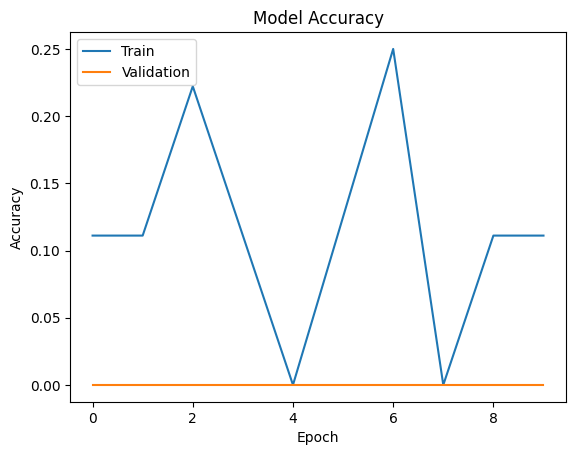

In [40]:
import keras
from matplotlib import pyplot as plt

# Train your model and save the history
history = model.fit(train_dataset, steps_per_epoch=3, epochs=10, validation_data=validation_dataset)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'])  # Use 'acc' for training accuracy
plt.plot(history.history['val_accuracy'])  # Use 'val_acc' for validation accuracy
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


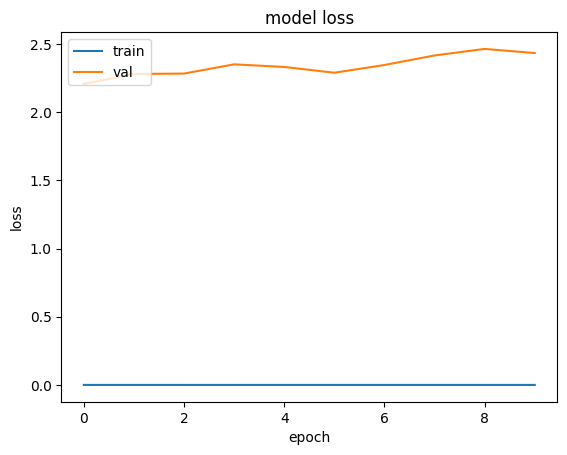

In [41]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()